In [ ]:
import os
import pandas as pd

data_path = os.path.join("..", "data", "nifty50_10years.csv")
df = pd.read_csv(data_path)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df['Differenced_Close'] = df['Close'].diff().dropna()

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Prepare the differenced data (already stationary)
differenced_close = df['Differenced_Close'].dropna()  # Make sure to remove NaN values
dates = df.index[1:]  # Use the dates (ensure index is datetime)

# Step 3: Build the ARIMA(1,1,0) model
arima_model = ARIMA(differenced_close, order=(1, 1, 1))  # AR(1), I(1), MA(1)
arima_fitted = arima_model.fit()

# Step 4: Check the results
print(arima_fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Differenced_Close   No. Observations:                 2459
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15548.966
Date:                Wed, 05 Feb 2025   AIC                          31103.932
Time:                        05:38:29   BIC                          31121.353
Sample:                             0   HQIC                         31110.262
                               - 2459                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0216      0.011     -1.983      0.047      -0.043      -0.000
ma.L1         -0.9989      0.001   -786.565      0.000      -1.001      -0.996
sigma2      1.823e+04    248.630     73.338      0.0


The ARIMA(1, 1, 1) model is a time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components. In this model, the "AR(1)" term indicates that the current value is influenced by the previous value of the differenced closing price, with a coefficient of -0.0216, suggesting a weak negative relationship between the current and the previous differenced value. The "I(1)" term shows that the series has been differenced once to make it stationary, which is essential for eliminating trends and stabilizing the mean. The "MA(1)" term indicates that the model uses the previous error term (residual) to adjust for any random noise, with a coefficient of -0.9989, which is highly significant, indicating that the error from the previous time step has a strong negative influence on the current value.

The model's log-likelihood of -15548.966 and the AIC value of 31103.932 suggest a reasonable fit, though AIC values lower than this would indicate a better fit. The p-value for the AR(1) term (0.047) and the MA(1) term (0.000) are statistically significant, confirming that both the autoregressive and moving average components play a crucial role in predicting the differenced closing prices. Additionally, the sigma squared value (1.823e+04) represents the variance of the error terms, showing some noise in the data.

However, the diagnostic tests reveal issues with the model. The Ljung-Box test (Q = 0.00, p-value = 0.98) shows that there is no significant autocorrelation in the residuals, suggesting the model may have captured the dependencies well. Yet, the Jarque-Bera test (p-value = 0.00) reveals that the residuals are not normally distributed, with a skewness of -0.97 and a kurtosis of 13.39, suggesting that the residuals have fat tails. These findings imply that while the ARIMA(1, 1, 1) model captures some of the patterns in the data, it may require further refinement to fully address all data complexities and improve prediction accuracy.

In [ ]:

# Step 5: Forecasting the future values (for example, 10 steps ahead)
forecast_steps = 100
forecast_diff = arima_fitted.forecast(steps=forecast_steps)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#Step 6: Prepare forecasted dates for visualization
forecast_dates = pd.date_range(start=dates[-1], periods=forecast_steps + 1, freq='D')[1:]

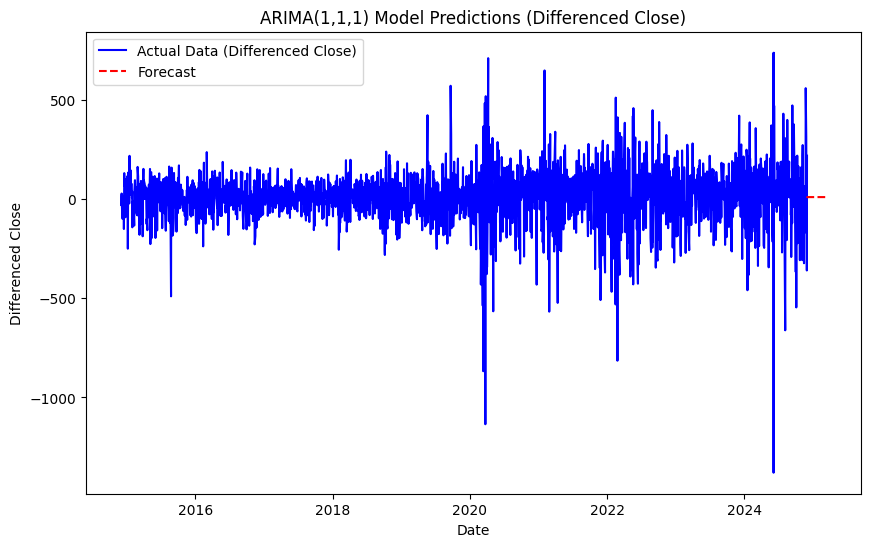

In [ ]:
# Step 5: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, differenced_close, label='Actual Data (Differenced Close)', color='blue')
plt.plot(forecast_dates, forecast_diff, label='Forecast', color='red', linestyle='--')
plt.legend(loc='best')
plt.title('ARIMA(1,1,1) Model Predictions (Differenced Close)')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.show()

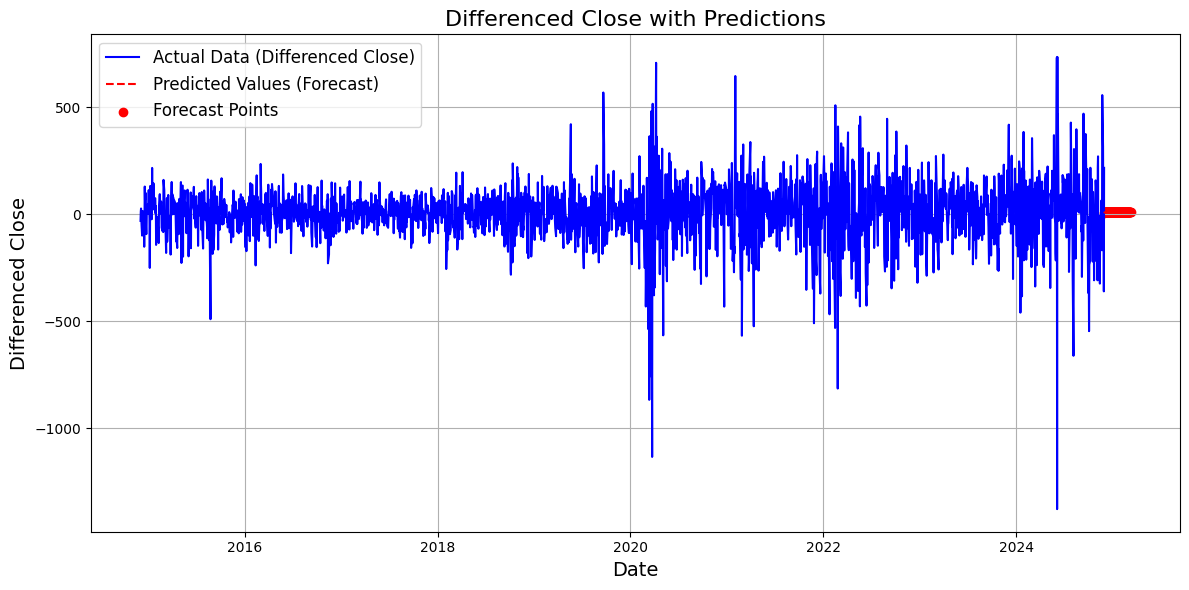

In [ ]:
import matplotlib.pyplot as plt

# Assuming `differenced_close` contains the actual data
# `predictions_diff` contains the predicted values
# `forecast_dates` contains the corresponding future dates for the predictions

# Step 1: Combine dates and data for plotting
combined_dates = np.concatenate([dates, forecast_dates])  # Combine historical and forecast dates
combined_values = np.concatenate([differenced_close, forecast_diff])  # Combine actual and predicted values

# Step 2: Plot the combined data
plt.figure(figsize=(12, 6))
plt.plot(dates, differenced_close, label="Actual Data (Differenced Close)", color="blue")  # Historical data
plt.plot(forecast_dates, forecast_diff, label="Predicted Values (Forecast)", color="red", linestyle="--")  # Predictions
plt.scatter(forecast_dates, forecast_diff, color="red", marker="o", label="Forecast Points")  # Highlight forecast points

# Step 3: Add labels, title, and legend
plt.title("Differenced Close with Predictions", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Differenced Close", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Step 4: Display the plot
plt.show()

In [ ]:
# Step 7: Convert differenced forecasted values back to actual values
last_actual_close = df['Close'].iloc[-1]
predicted_close = last_actual_close + np.cumsum(forecast_diff)  # Convert differenced values to actual values

# Step 8: Create a DataFrame to display forecasted values with dates
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close': predicted_close
})

# Step 9: Display the forecasted values with dates
print(forecast_df.head(10))


           Date  Forecasted_Close
2459 2024-11-30      24135.339443
2460 2024-12-01      24144.181454
2461 2024-12-02      24152.923892
2462 2024-12-03      24161.668485
2463 2024-12-04      24170.413031
2464 2024-12-05      24179.157578
2465 2024-12-06      24187.902125
2466 2024-12-07      24196.646671
2467 2024-12-08      24205.391218
2468 2024-12-09      24214.135765


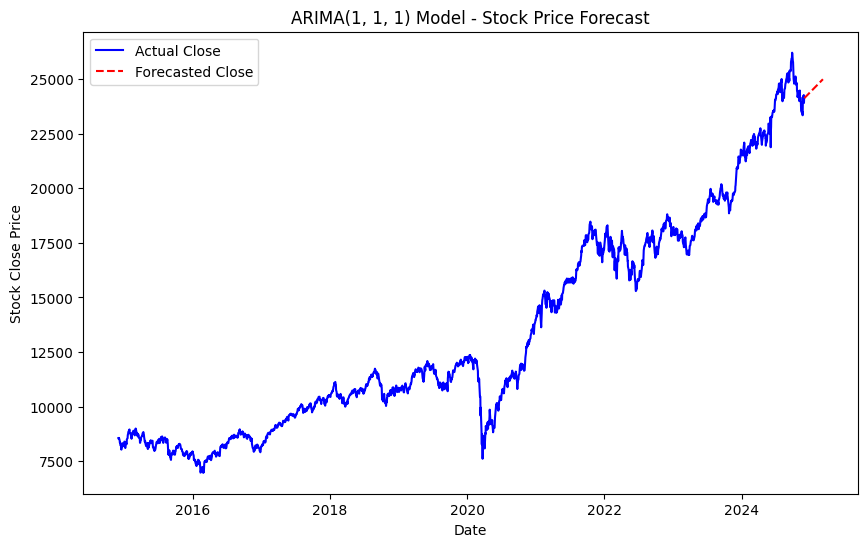

In [ ]:
# Step 10: Visualize the actual and forecasted values
plt.figure(figsize=(10, 6))
# Use df.index for the x-axis to match the length of df['Close']
plt.plot(df.index, df['Close'], label='Actual Close', color='blue')
plt.plot(forecast_dates, predicted_close, label='Forecasted Close', color='red', linestyle='--')
plt.legend(loc='best')
plt.title('ARIMA(1, 1, 1) Model - Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.show()

Plotting Residuals

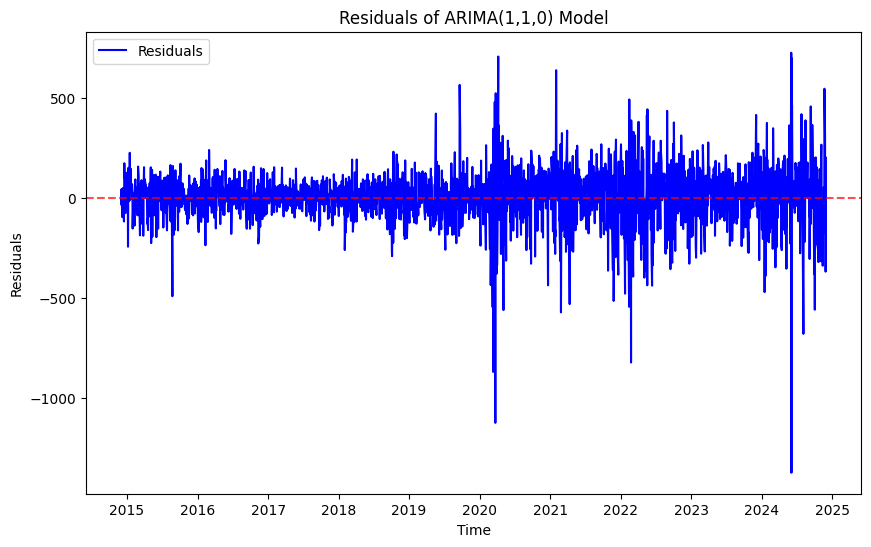

In [ ]:
# Extract residuals
residuals = arima_fitted.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, linestyle='--', color='red', alpha=0.7)
plt.title('Residuals of ARIMA(1,1,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()



The spikes in the residual plot and increasing variance over time suggest that the model may need refinement to handle heteroscedasticity (e.g., by applying transformations like a log or Box-Cox transformation).

 Plotting ACF of Residuals

<Figure size 1000x600 with 0 Axes>

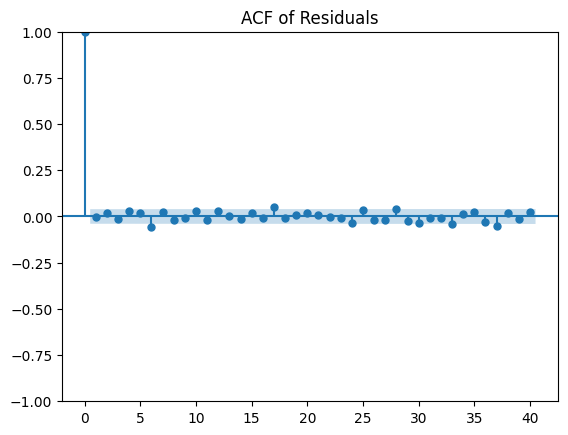

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)  # Adjust lags based on data
plt.title('ACF of Residuals')
plt.show()


The significant autocorrelation at lag 1 (and possibly lag 2) in the ACF plot suggests the ARIMA(1,1,0) model may be underfitting. Adding more AR (autoregressive) or MA (moving average) terms (e.g., ARIMA(2,1,1) or similar) might better capture the remaining patterns in the residuals.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Test ARIMA(2,1,1)
arima_model_refined = ARIMA(df['Differenced_Close'], order=(2, 1, 1))
arima_fitted_refined = arima_model_refined.fit()

print(arima_fitted_refined.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Differenced_Close   No. Observations:                 2460
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15556.481
Date:                Wed, 05 Feb 2025   AIC                          31120.961
Time:                        05:39:42   BIC                          31144.191
Sample:                             0   HQIC                         31129.402
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0209      0.011     -1.877      0.060      -0.043       0.001
ar.L2          0.0183      0.011      1.625      0.104      -0.004       0.040
ma.L1         -0.9997      0.002   -447.245      0.0

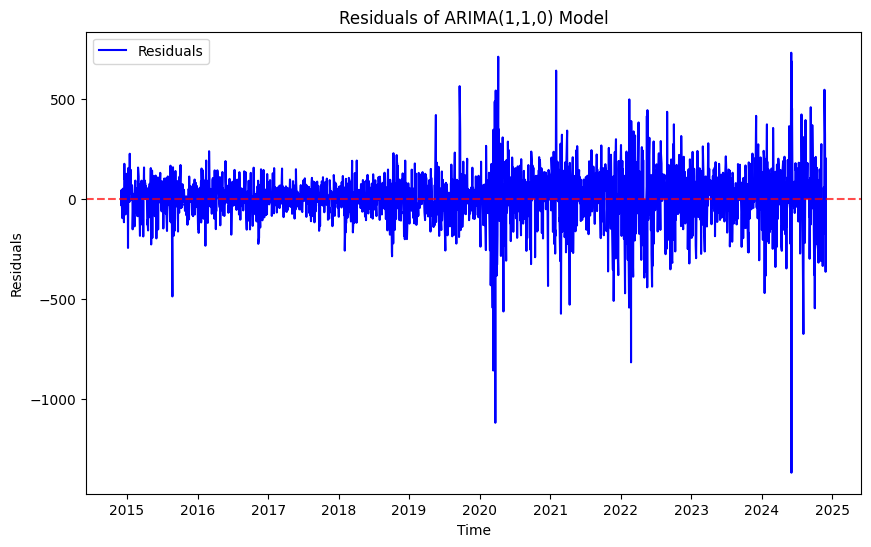

In [ ]:
# Extract residuals
residuals = arima_fitted_refined.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, linestyle='--', color='red', alpha=0.7)
plt.title('Residuals of ARIMA(1,1,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

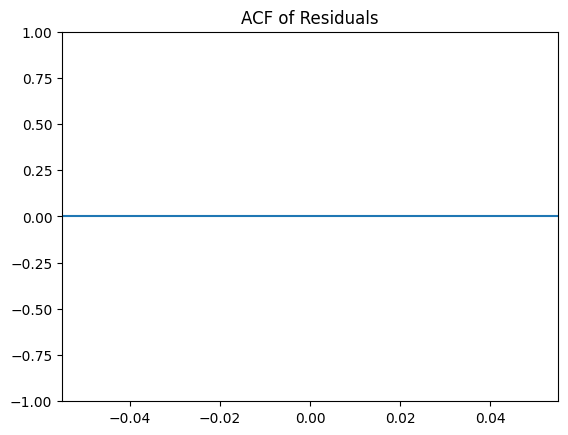

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)  # Adjust lags based on data
plt.title('ACF of Residuals')
plt.show()

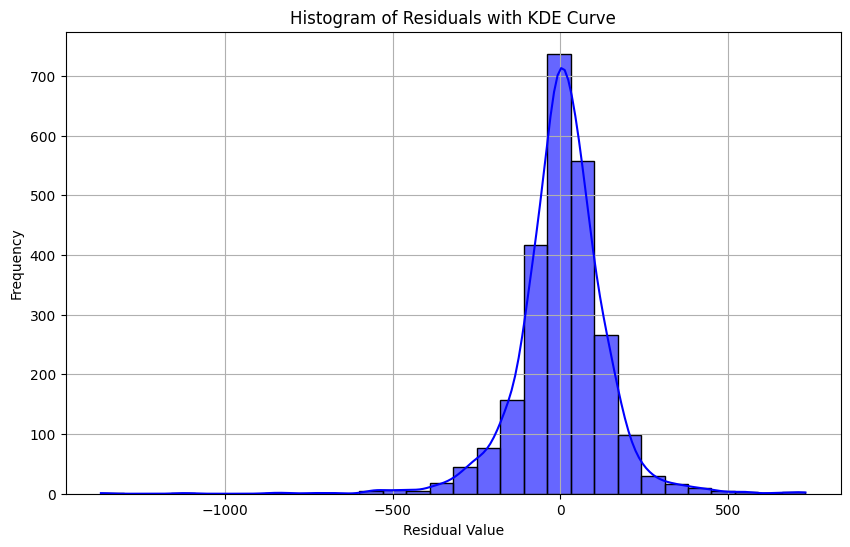

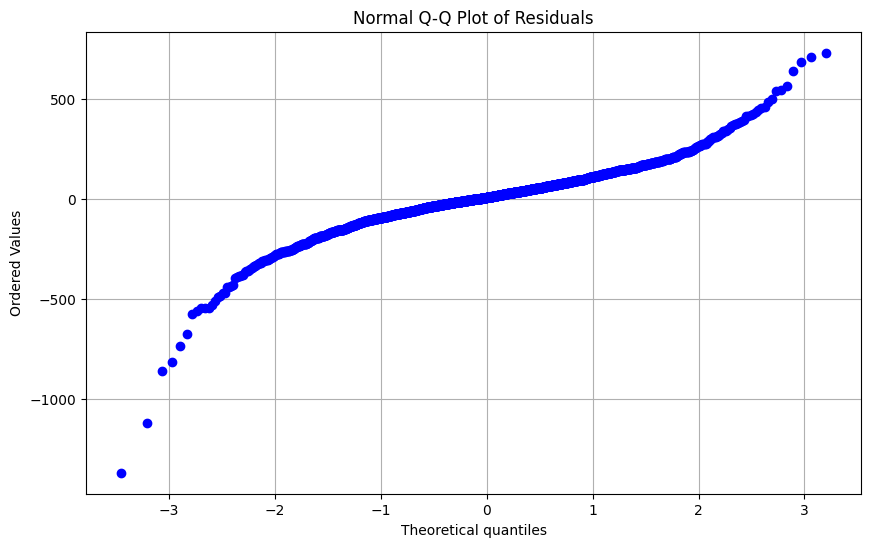

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Step 1: Extract residuals from the ARIMA model
residuals = arima_fitted_refined.resid

# Step 2: Plot histogram with a density curve
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', edgecolor='k', alpha=0.6)
plt.title('Histogram of Residuals with KDE Curve')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Generate a Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


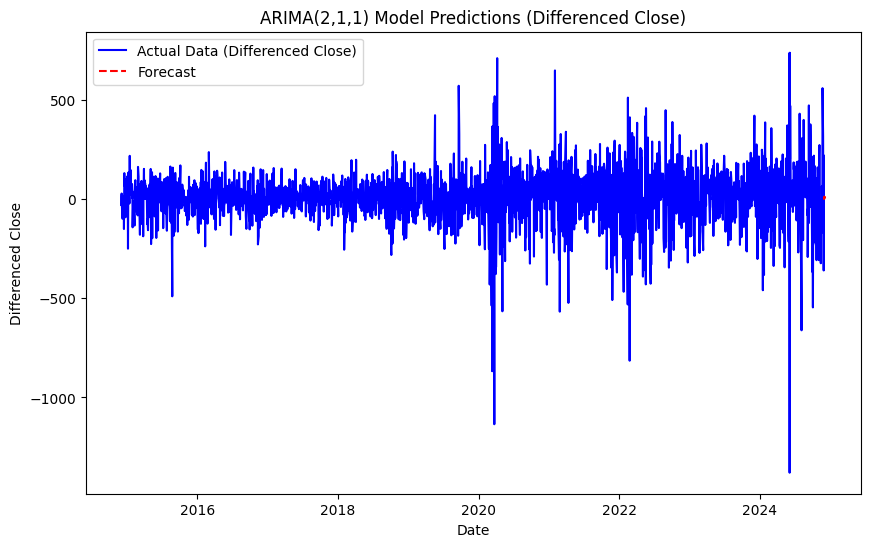

In [ ]:
# Step 5: Forecasting the future values (for example, 10 steps ahead)
forecast_steps = 10
forecast_diff = arima_fitted_refined.forecast(steps=forecast_steps)

#Step 6: Prepare forecasted dates for visualization
forecast_dates = pd.date_range(start=dates[-1], periods=forecast_steps + 1, freq='D')[1:]

# Step 5: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, differenced_close, label='Actual Data (Differenced Close)', color='blue')
plt.plot(forecast_dates, forecast_diff, label='Forecast', color='red', linestyle='--')
plt.legend(loc='best')
plt.title('ARIMA(2,1,1) Model Predictions (Differenced Close)')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.show()



In [ ]:
# Step 7: Convert differenced forecasted values back to actual values
last_actual_close = df['Close'].iloc[-1]
predicted_close = last_actual_close + np.cumsum(forecast_diff)  # Convert differenced values to actual values

# Step 8: Create a DataFrame to display forecasted values with dates
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close': predicted_close
})

# Step 9: Display the forecasted values with dates
print(forecast_df)

           Date  Forecasted_Close
2460 2024-11-30      24126.657315
2461 2024-12-01      24137.427855
2462 2024-12-02      24143.821076
2463 2024-12-03      24150.584597
2464 2024-12-04      24157.260120
2465 2024-12-05      24163.944270
2466 2024-12-06      24170.626626
2467 2024-12-07      24177.309178
2468 2024-12-08      24183.991693
2469 2024-12-09      24190.674212


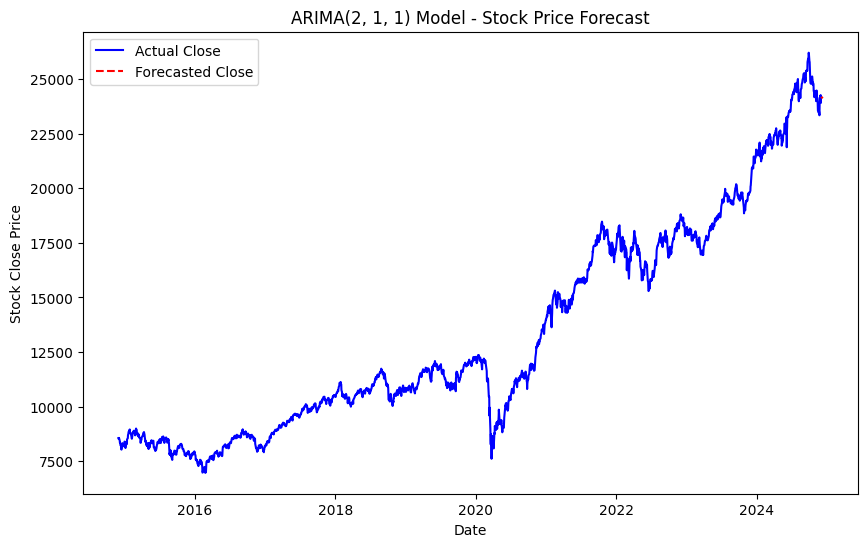

In [ ]:
# Step 10: Visualize the actual and forecasted values
plt.figure(figsize=(10, 6))
# Use df.index for the x-axis to match the length of df['Close']
plt.plot(df.index, df['Close'], label='Actual Close', color='blue')
plt.plot(forecast_dates, predicted_close, label='Forecasted Close', color='red', linestyle='--')
plt.legend(loc='best')
plt.title('ARIMA(2, 1, 1) Model - Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.show()

**ARIMA Model with test and train data**

ADF Statistic: 1.313659488482476
p-value: 0.9966843318712351
The series is non-stationary. Differencing is needed.
ADF Statistic: -12.087101839425113
p-value: 2.1648539247352614e-22
The series is stationary.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3388
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -20255.640
Date:                Wed, 02 Apr 2025   AIC                          40519.281
Time:                        15:09:27   BIC                          40543.791
Sample:                             0   HQIC                         40528.043
                               - 3388                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0222      0.009      2.370      0.018       0.004       0.041
ar.L2          0.0105      0.007      1.452      0.146      -0.004       0.025
ma.L1         -0.9996      0.002   -647.039      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


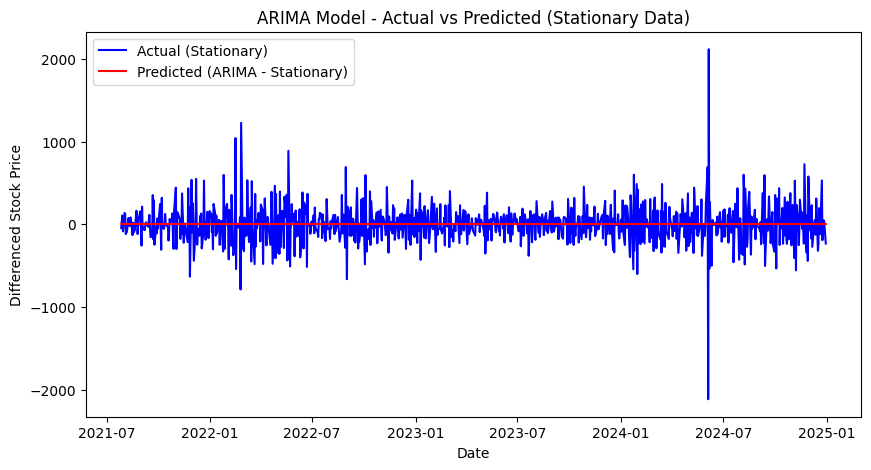

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os


data_path = os.path.join("..", "data", "nifty50_10years.csv")
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use only the 'Close' price for ARIMA
close_prices = df['Close']

# Check stationarity using Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary. Differencing is needed.")

adf_test(close_prices)

# Make the series stationary (1st order differencing)
close_prices_diff = close_prices.diff().dropna()
adf_test(close_prices_diff)

# Train-test split
train_size = int(len(close_prices_diff) * 0.8)
train, test = close_prices_diff[:train_size], close_prices_diff[train_size:]

# Ensure test data is also stationary
test = test.diff().dropna()

# Fit ARIMA model on differenced data
arima_model = ARIMA(train, order=(2,1,1)) # (p,d,q) values can be tuned
arima_model_fit = arima_model.fit()

# Print model summary
print(arima_model_fit.summary())

# Predict on test set
predictions_diff = arima_model_fit.forecast(steps=len(test))

# Evaluate ARIMA model on stationary data
mae_arima = mean_absolute_error(test, predictions_diff)
rmse_arima = np.sqrt(mean_squared_error(test, predictions_diff))
print(f"ARIMA MAE: {mae_arima}, ARIMA RMSE: {rmse_arima}")

# Plot ARIMA predictions on stationary data
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual (Stationary)", color='blue')
plt.plot(test.index, predictions_diff, label="Predicted (ARIMA - Stationary)", color='red')
plt.title("ARIMA Model - Actual vs Predicted (Stationary Data)")
plt.xlabel("Date")
plt.ylabel("Differenced Stock Price")
plt.legend()
plt.show()